In [2]:
import sys
sys.path.append('../../numpy/1D')

from utils import *
from env import *
from model import *
from matplotlib import gridspec

In [3]:
# set directory to folder with model trained with different place field parameter combinations
data_dir = "/Users/mganeshkumar/Library/CloudStorage/OneDrive-HarvardUniversity/Code/online_pf_learning/online/1D/"

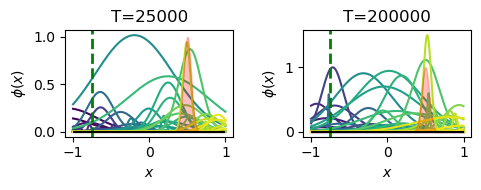

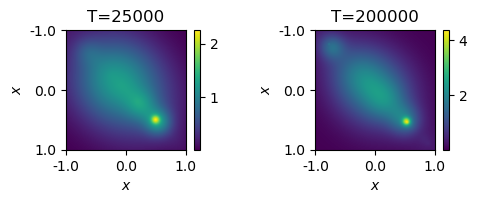

In [9]:
npc = 64
ns = 0.0001
pidx = '012'

# labels = ['$\\theta_t + \\xi_t$', '$\{W_t^\pi,w_t^v\} + \\xi$']
titles = ['Noisy Field parameter Update: ', 'Noisy Actor-Critic Update: ']
stable_perf = 25000
episodes = 200000

exptname = f"/data/full_1D_td_online_{ns}ns_{pidx}p_{npc}n_0.01plr_0.01clr_0.0001llr_0.0001alr_0.0001slr_rand_0.5a_0.1s_2a_2020s_200000e_5rmax_0.05rsz"
[logparams, latencys,cum_rewards, allcoords] = saveload(data_dir+exptname, 1, 'load')

# f.suptitle(title + label)
trials, pv_corr,rep_corr, startxcor, endxcor = get_pvcorr(logparams, stable_perf, episodes, num=2)

f,axs = plt.subplots(1,2,figsize=(5,2))
plot_pc(logparams, stable_perf,ax=axs[0], title=f"T={stable_perf}", goalsize=0.05)
plot_pc(logparams, episodes,ax=axs[1], title=f"T={episodes}", goalsize=0.05)
f.tight_layout()    
# f.savefig(f'./svgs/drift_pc_{label}_{npc}.svg')

f,axs = plt.subplots(1,2,figsize=(5,2))
plot_rep_sim(startxcor, stable_perf, ax=axs[0])
plot_rep_sim(endxcor, episodes, ax=axs[1])
f.tight_layout()    
# f.savefig(f'./svgs/drift_rc_{label}_{npc}.svg')


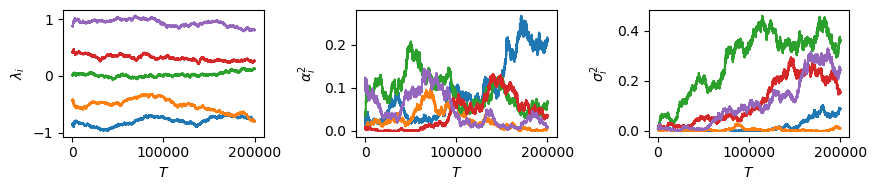

In [10]:
f,ax = plt.subplots(1,3,figsize=(3*3,2))
param_delta = get_param_changes(logparams, episodes)
indices = np.linspace(5,param_delta[2].shape[1]-5,5,dtype=int)

for idx in indices:
    amp = (param_delta[2][:,idx])**2
    ax[1].plot(amp, label=idx)

    cent = (param_delta[0][:,idx])
    ax[0].plot(cent, label=idx)

    width = (param_delta[1][:,idx])**2
    ax[2].plot(width, label=idx)

ax[1].set_ylabel('$\\alpha_i^2$')
ax[0].set_ylabel('$\lambda_i$')
ax[2].set_ylabel('$\\sigma_i^2$')
for i in range(3):
    ax[i].set_xlabel('$T$')

f.tight_layout()
# f.savefig(f'./svgs/param_drift_{npc}_{ns}.svg')